# Desafio para o processo seletivo Murabei

**Objetivo**: prever o resultado no normexam pelas características de alunos e escolas.  
Deve responder quais dos tipos de escola é mais eficiente na formação pelo resultado do exame (misto, só homem ou só mulher).  
Manter um código organizado!

**Resultados**: realizar tratamento dos dados e a modelagem que caracteriza as escolas segundo o exame.  
Em comentário discutir sibre a eficiência dos diferentes tipos de escola, justificados pelos parâmetros do modelo.

**Envio**: Arquivo com nome do candidato e com um cabeçalho (tratamento e modelagem).  
Entregar como resposta do email do Desafio.

escola = s
estudante = e
#### Informações sobre as categorias
| variável | descrição |
| :- | :- |
| school ns | id da escola |
| normexam ne | score do exame normalizada |
| schgend cs | gênero da escola |
| schavg ns | média escolar da pontuação de admissão |
| vr ce | faixa de pontuação de raciocínio verbal no nível do aluno na admissão |
| intake ce | faixa de pontuação de admissão do aluno |
| standLRT ne | pontuação do teste LR padronizado |
| sex ce | sexo do estudante - dentre "F" e "M" |
| type cs | tipo de escola |
| student ne | id do aluno (dentro da escola) |

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Base de dados

#### 1. cat_school_data variáveis categóricas que são aplicadas às escolas

In [48]:
df_cat_school_data = pd.read_csv("../dataset/cat_school_data.csv", sep=";")

df_schgend = df_cat_school_data[df_cat_school_data["variable"] == "schgend"]
df_type = df_cat_school_data[df_cat_school_data["variable"] == "type"]

<AxesSubplot:ylabel='value'>

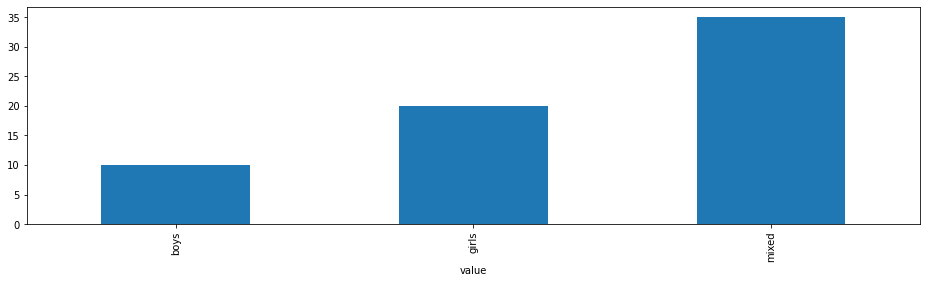

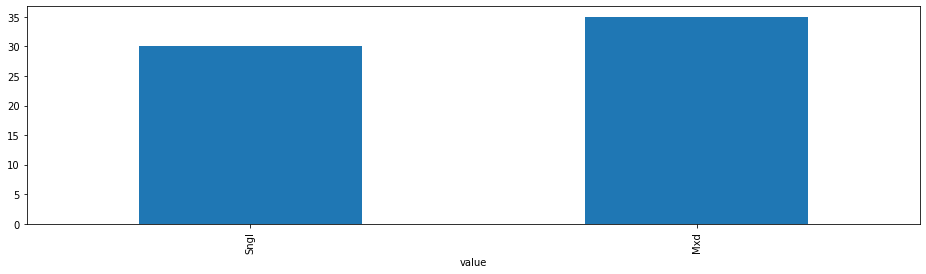

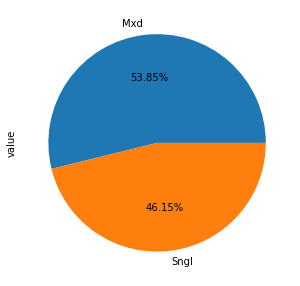

In [76]:
# Gráfico de barras
plt.figure(1, figsize = ((16,4)))
df_schgend.groupby(["value"]).value.count().sort_values().plot(kind='bar')
plt.figure(2, figsize = ((16,4)))
df_type.groupby(["value"]).value.count().sort_values().plot(kind='bar')

# Gráfico de pizza para o df_type
df_new_type = np.where(df_type['value'].str.contains('Mxd'), 'Mxd', 'Sngl')
df_new_type_group = df_type.groupby(['value', df_new_type]).size().unstack().fillna(0)

plt.figure(3, figsize=(5,5))
df_new_type_group.sum().plot(kind='pie', autopct='%0.2f%%', label="value" )

<AxesSubplot:ylabel='None'>

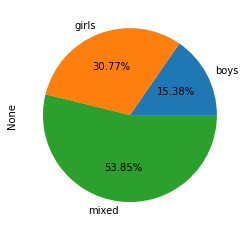

In [99]:
# gráfico de pizza para o df_schgend
# arr_new_schgend = np.where(df_schgend['value'].str.contains('boys'), 'boys',df_schgend['value'])
# df_new_schgend_group = df_schgend.groupby(['value', arr_new_schgend]).size().unstack().fillna(0)
# df_new_schgend_group.sum().plot(kind='pie', autopct='%0.2f%%', label='value')

# Mais simples
arr = df_schgend['value'].to_numpy()
df = df_schgend.groupby(['value']).size()
df.plot(kind='pie', autopct='%0.2f%%')

#### 2. num_school_data variáveis numéricas que são aplicadas às escolas

In [100]:
df_num_school_data = pd.read_csv("../dataset/num_school_data.csv", sep=";")

#### 3. cat_student_data variáveis categóricas que são aplicadas aos estudantes

In [143]:
df_cat_student_data = pd.read_csv("../dataset/cat_student_data.csv", sep=";", index_col=0)
df_cat_student_data

,school,student,variable,value
1,1,143,intake,bottom 25%
2,1,145,intake,mid 50%
3,1,142,intake,top 25%
4,1,141,intake,mid 50%
5,1,138,intake,mid 50%
...,...,...,...,...
12173,65,46,vr,mid 50%
12174,65,59,vr,mid 50%
12175,65,60,vr,mid 50%
12176,65,61,vr,mid 50%


In [167]:
df_intake = df_cat_student_data[df_cat_student_data["variable"] == "intake"]
df_sex = df_cat_student_data[df_cat_student_data["variable"] == "sex"]
df_vr = df_cat_student_data[df_cat_student_data["variable"] == "vr"]
df_intake

,school,student,variable,value
1,1,143,intake,bottom 25%
2,1,145,intake,mid 50%
3,1,142,intake,top 25%
4,1,141,intake,mid 50%
5,1,138,intake,mid 50%
...,...,...,...,...
4055,65,46,intake,bottom 25%
4056,65,59,intake,mid 50%
4057,65,60,intake,mid 50%
4058,65,61,intake,mid 50%


In [176]:
# Avaliando a variável intake e duplicidade

df_intake_group = df_intake.groupby(["school", "student", "value"]).student.count()
aux = df_intake_group.drop_duplicates()
aux

aux = df_intake[df_intake[["school","student"]].duplicated()]
aux

# Neste caso o value pode ser igual ou diferente, analisar isso!

,school,student,variable,value
2759,43,86,intake,top 25%
3228,50,39,intake,mid 50%
3316,52,2,intake,bottom 25%
3351,52,21,intake,top 25%


In [159]:
# Long ou Wide?

df = pd.pivot(df, index='player', columns='team', values='points') #to wide
df = pd.melt(df, id_vars='col1', value_vars=['col2', 'col3', ...]) #to long

1    3941
2       3
Name: student, dtype: int64

In [18]:
# 1. df_cat_school_data = pd.read_csv("../dataset/cat_school_data.csv")
# 3. df_cat_student_data = pd.read_csv("../dataset/cat_student_data.csv")
# df_num_school_data = pd.read_csv("../dataset/num_school_data.csv")
# df_num_student_data = pd.read_csv("../dataset/num_student_data.csv")